In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
dataset = pd.read_csv("monthly_csv.csv")

In [17]:
limite = math.floor(len(dataset)*0.0) #Porcentaje para entrenamiento
limite1 = math.floor(len(dataset)*0.95) #Porcentaje para entrenamiento
#train = len(dataset)-check 

In [4]:
dataset
dataset['Date'] = pd.to_datetime(dataset['Date']) #Modifica formato de fecha
dataset.set_index('Date', inplace = True)


In [5]:
dataset.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [6]:
dataset.tail()

,Price
Date,
2018-11-01,1221.275
2018-12-01,1249.887
2019-01-01,1291.630
2019-02-01,1319.755
2019-03-01,1302.286


In [7]:
dataset.iloc[limite,0]


1115.5539999999999

In [8]:
limite1-limite

67

In [9]:
dataset.index = pd.date_range(start='1950-01-01',end='2019-04-01',freq= 'M')

In [10]:
train, test = dataset.iloc[limite:limite1, 0], dataset.iloc[limite1-1:,0]

In [11]:
train

2010-03-31    1115.554
2010-04-30    1148.475
2010-05-31    1204.321
2010-06-30    1232.382
2010-07-31    1196.000
2010-08-31    1213.464
2010-09-30    1271.461
2010-10-31    1343.190
2010-11-30    1371.784
2010-12-31    1393.512
2011-01-31    1360.475
2011-02-28    1371.313
2011-03-31    1422.848
2011-04-30    1474.431
2011-05-31    1512.188
2011-06-30    1528.380
2011-07-31    1568.526
2011-08-31    1759.500
2011-09-30    1780.648
2011-10-31    1667.893
2011-11-30    1735.977
2011-12-31    1652.725
2012-01-31    1656.095
2012-02-29    1743.095
2012-03-31    1675.057
2012-04-30    1648.539
2012-05-31    1585.114
2012-06-30    1595.632
2012-07-31    1592.784
2012-08-31    1625.682
                ...   
2013-04-30    1485.905
2013-05-31    1416.143
2013-06-30    1342.700
2013-07-31    1284.348
2013-08-31    1345.048
2013-09-30    1348.464
2013-10-31    1314.402
2013-11-30    1277.417
2013-12-31    1221.588
2014-01-31    1243.068
2014-02-28    1298.713
2014-03-31    1336.560
2014-04-30 

In [12]:
model = ExponentialSmoothing(train, trend = 'add', damped = False, seasonal = 'add',seasonal_periods=12).fit()

In [13]:
pred = model.predict(start=limite1-limite, end =limite1-limite+len(test))

/home/mauricio/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [14]:
pred

2015-10-31    1128.850930
2015-11-30    1107.365068
2015-12-31    1099.626867
2016-01-31    1102.258243
2016-02-29    1080.411316
2016-03-31    1035.851441
2016-04-30     991.078016
2016-05-31     940.620022
2016-06-30     898.473380
2016-07-31     865.304903
2016-08-31     881.372856
2016-09-30     916.716577
2016-10-31     910.168996
2016-11-30     888.683134
2016-12-31     880.944933
2017-01-31     883.576308
2017-02-28     861.729381
2017-03-31     817.169506
2017-04-30     772.396082
2017-05-31     721.938087
2017-06-30     679.791445
2017-07-31     646.622969
2017-08-31     662.690922
2017-09-30     698.034642
2017-10-31     691.487061
2017-11-30     670.001199
2017-12-31     662.262998
2018-01-31     664.894374
2018-02-28     643.047447
2018-03-31     598.487572
2018-04-30     553.714147
2018-05-31     503.256153
2018-06-30     461.109511
2018-07-31     427.941034
2018-08-31     444.008987
2018-09-30     479.352708
2018-10-31     472.805127
2018-11-30     451.319265
2018-12-31  

(array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600., 1800.,
        2000.]), <a list of 10 Text yticklabel objects>)

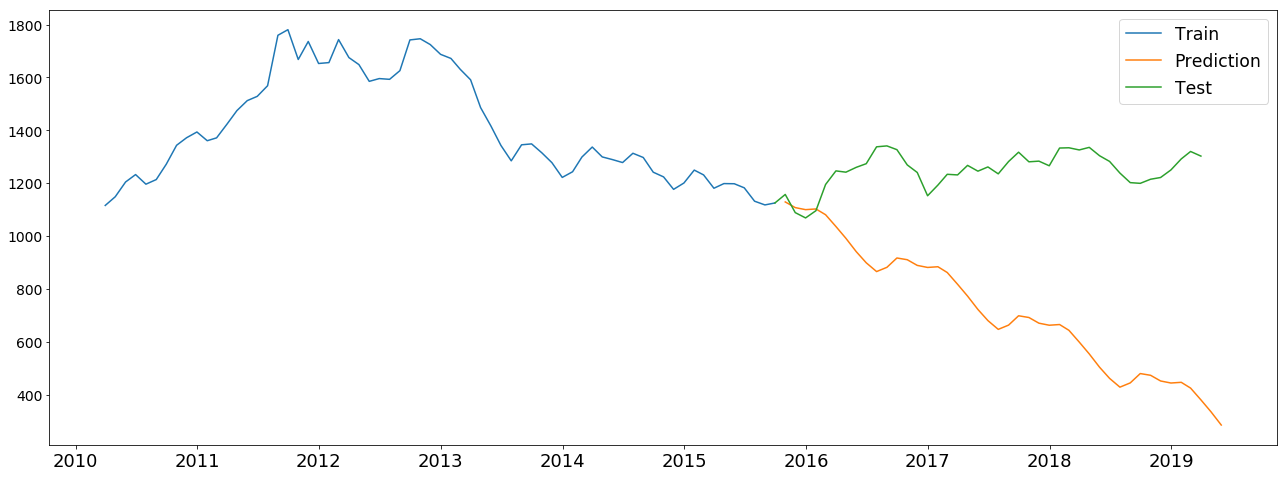

In [16]:
%matplotlib inline
plt.figure(figsize=(22,8))
plt.plot(train.index, train, label = 'Train')
plt.plot(pred.index, pred, label = 'Prediction')
plt.plot(test.index, test, label = 'Test')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)